In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def verify(df = None, specific_label = None):
    if specific_label:
        df = df[df['Label'] == specific_label].reset_index(drop = True)
    for label in sorted(df['Label'].unique()):
        imglist = []
        temp_df = df[df['Label'] == label]
        temp_df = temp_df.reset_index(drop = True)
        for i in range(len(temp_df)):
            pix = temp_df.iloc[i, 1:].values
            pix = list(map(int, pix))
            pix = np.array(pix)
            pix = pix.reshape((28, 28))
            imglist.append(pix)

        for a in range(0, len(imglist), 100):
            imgsublist = imglist[a : a+100]
            fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize = (40, 40))
            for idx, axi in enumerate(ax.flat):
                if idx < len(imgsublist):
                    axi.imshow(imgsublist[idx])
                else:
                    axi.imshow(np.ones(shape = (28, 28)))
                axi.axes.get_xaxis().set_ticks([])
                axi.axes.get_yaxis().set_ticks([])
            fig.savefig(f'/content/drive/MyDrive/Projects/Sudoku/Verify/Img__Label{label}__Set{a // 100}.jpg')
            del fig, ax

        print(f'Label {label} done.')

pixels_df = pd.read_excel('/content/drive/MyDrive/Projects/Sudoku/data002.xlsx')
verify(df = pixels_df, specific_label = None)

Output hidden; open in https://colab.research.google.com to view.

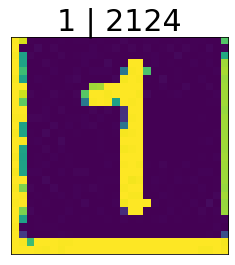

In [ ]:
def get_index(df = None, label = None, pos = None):
    df = df[df['Label'] == label].reset_index()
    pix = df.loc[pos-1, [f'Px_{i:03d}' for i in range(784)]].values
    pix = list(map(int, pix))
    pix = np.array(pix)
    pix = pix.reshape((28, 28))
    plt.imshow(pix)
    plt.title(f"{df.loc[pos-1, 'Label']} | {df.loc[pos-1, 'index'] + 2}", size = 30)
    plt.xticks([])
    plt.yticks([])
get_index(df = pixels_df, label = 1, pos = 104)

In [ ]:
# df01 = pd.read_excel('/content/drive/MyDrive/Projects/Sudoku/data001.xlsx')
# df02 = pd.read_excel('/content/drive/MyDrive/Projects/Sudoku/data002.xlsx')
# df00 = pd.concat([df01, df02], axis = 0)
# df00 = df00.sort_values(['Label'], ascending = [True])

# print(df01.columns)
# print(df02.columns)
# print(df00.columns)
# df00.Label.value_counts()

df00.to_excel('/content/drive/MyDrive/Projects/Sudoku/fulldata.xlsx', index = False)

In [ ]:
check = df00.isnull().sum().to_frame().reset_index()
check.columns = ['Column', 'NullCount']
check[check['NullCount'] != 0]

,Column,NullCount
